## Notebook 3: Pre-Processing the data

### Introduction

 [Data preprocessing](http://www.cs.ccsu.edu/~markov/ccsu_courses/datamining-3.html) is a crucial step for any data analysis problem.  It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.This involves a number of activities such as:
* Assigning numerical values to categorical data;
* Handling missing values; and
* Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).



In Notebook-2 [NB2_Exploratory data analysis](https://github.com/ShiroJean/Breast-cancer-risk-prediction/blob/master/NB2_ExploratoryDataAnalysis.ipynb). I explored the data, to help gain insight on the distribution of the data as well as how the attributes correlate to each other. I identified some features of interest. In this notebook I use feature selection to reduce high-dimension data, feature extraction and transformation for dimensionality reduction. 

### Goal:
Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model. 

#### Load data and essential libraries

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')


plt.rcParams['figure.figsize'] = (10,6) 
#plt.rcParams['axes.titlesize'] = 'large'



data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
#data.head()

#### Label encoding
Here, I assign the 30 features to a NumPy array X, and transform the class labels from their original string representation (M and B) into integers

In [2]:
#Assign predictors to a variable of ndarray (matrix) type
array = data.values
X = array[:,1:31]
y = array[:,0]

In [3]:
#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Call the transform method of LabelEncorder on two dummy variables
#le.transform (['M', 'B'])

> *After encoding the class labels(diagnosis) in an array y, the malignant tumors are now represented as class 1(i.e prescence of cancer cells) and the benign tumors are represented as class 0 (i.e no cancer cells detection), respectively*, illustrated by calling the transform method of LabelEncorder on two dummy variables.**


#### Split data into training and test sets

The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here I will
* Split the available data into a training set and a testing set. (70% training, 30% test)
* Train the algorithm on the first part,
* make predictions on the second part and 
* evaluate the predictions against the expected results. 

The size of the split can depend on the size and specifics of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing.


In [4]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

#### Feature Standardization

* Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. 

* As seen in [NB2_Exploratory data analysis](https://github.com/ShiroJean/Breast-cancer-risk-prediction/blob/master/NB2_ExploratoryDataAnalysis.ipynb) the raw data has differing distributions which may have an impact on the most ML algorithms. Most machine learning and optimization algorithms behave much better if features are on the same scale.


Let’s evaluate the same algorithms with a standardized copy of the dataset. Here, I use sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one


In [18]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

#### feature extraction tthrough PCA

#### Feature Selection

From the pair plot---- lot of feature pairs divide nicely the data to a similar extent. therefore, it makes sense to use one of the dimensionality reduction methods to try to use as many features as possible and maintian as much information as possible when working with only 2 dimensions. I will use PCA. based on Anistropic's great script it also seems that standardizing the features is crucial.

plt.savefig("../figures/2016-12-7" + "employees vs hours.png")



In [33]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(Xs)

# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_
#print(fit.components_)

Explained Variance: [ 0.44272026  0.18971182]


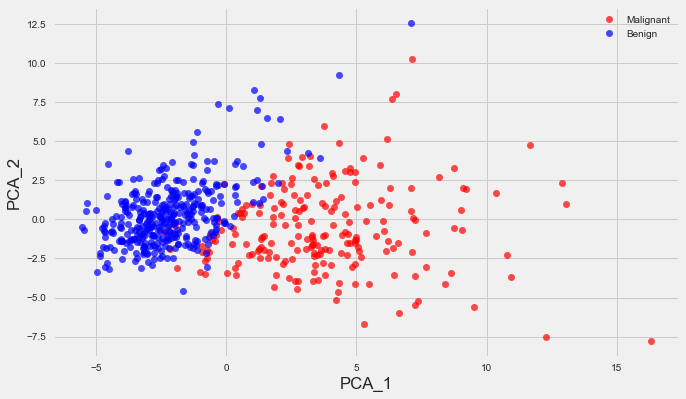

In [26]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])